# Pokigen
This code uses a beta variational auto encoder [B.1] to generate pokemon like images.

In [1]:
print("Using full network")
import sys
sys.path.append("../src")
#from cnn_beta_vae import CNNBetaVAE
#from cnn_beta_vae_mobilenet import CNNBetaVAE
from cnn_beta_vae_light import CNNBetaVAE

# Need matplotlib to plot some curves
import matplotlib.pyplot as plt
# Need opencv for image processing
import cv2

# Need to compute svd 
from scipy.linalg import svd

# Need to do a PCA on latent space
from sklearn.decomposition import PCA

# Ofcourse we need numpy
import numpy as np

Using full network


In [2]:
#Constants
latent_dim_size=27

Let's create the network

In [3]:
cnnbvae = CNNBetaVAE((128,128,3),latent_dim_size,2, model_weights_path="../models/model.h5")

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 3)  84          input[0][0]                      
__________________________________________________________________________________________________
tf_op_layer_Relu (TensorFlowOpL multiple             0           conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 3)    0           tf_op_layer_Relu[0][0]           
____________________________________________________________________________________________

# Reloading weights (if not a new training)

In [4]:
# Load models if you want tyo start from previous training otherwize please skip
cnnbvae.load_weights("../models/model_weights.h5")

# Database import
If the database was not added to your dir. Please use those lines to download and install it.

This was tested on Ubuntu PC using bash shell.
If you are using windows, you may need to change some shell commands to dos style ones. 

In [5]:
# Download the pokemon database from rileynwong's github
#!wget https://github.com/rileynwong/pokemon-images-dataset-by-type/archive/master.zip
# Extract and select the all subdatabase 
#!unzip master.zip 
#!mv pokemon-images-dataset-by-type-master/all ../database
# Remove resulting files
#!rm -R pokemon-images-dataset-by-type-master
#!rm master.zip

In [6]:
# The database is ready, let's load it and preprocess it
db = "../database"
# Load training/validation database and preprocess it
images, pokemons_files = cnnbvae.load_images(db, return_image_file_names=True)
# Preprocess data
images = cnnbvae.preprocess_images(images)

In [7]:
def show_photos(img_vals, image_names, nb_columns=4, figsize=(10,20), max_nbphotos=12):
    fig = plt.figure(figsize=figsize)
    nb_rows = len(image_names)//nb_columns+1

    if len(image_names)>max_nbphotos:
        nb_files= max_nbphotos
    else:
        nb_files=len(image_names)

    for i in range(nb_files):
        img =plt.subplot(nb_files,nb_columns,i+1)
        img.imshow((img_vals[i,:,:]))
        img.set_title(image_names[i])
    plt.tight_layout()

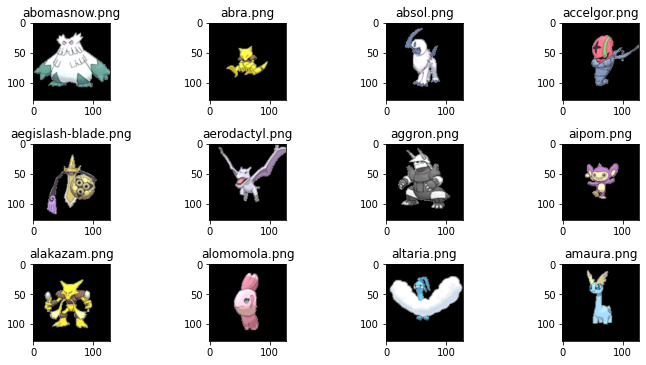

In [8]:
show_photos(images, pokemons_files)

In [9]:
#cnnbvae.learn(images,100)

In [10]:
#plt.figure()
#plt.grid()
#plt.plot(cnnbvae.loss_buffer, label="Loss")
#plt.plot(cnnbvae.val_loss_buffer, label="Validation Loss")
#plt.title("Loss curves")
#plt.savefig("../figures/{}_loss".format())

In [11]:
out = cnnbvae.predict(images)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


0.11269733
0.0


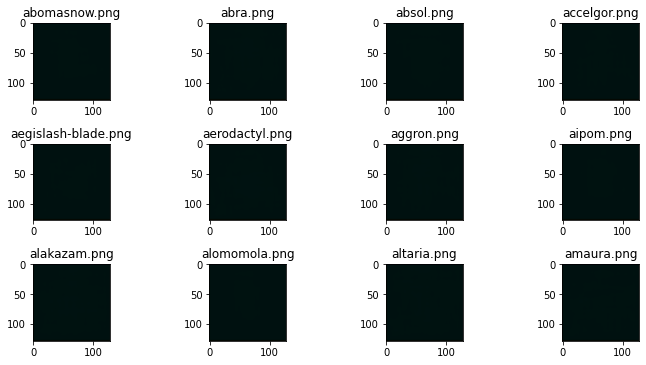

In [12]:
print(out.max())
print(out.min())
show_photos(out, pokemons_files)#


In [13]:
encoded = cnnbvae.encoder.predict(images)[0]

In [12]:
# We find out a new subspace where the spreading is maximum 
pca = PCA(2)
projected=pca.fit_transform(encoded)

(809, 27)


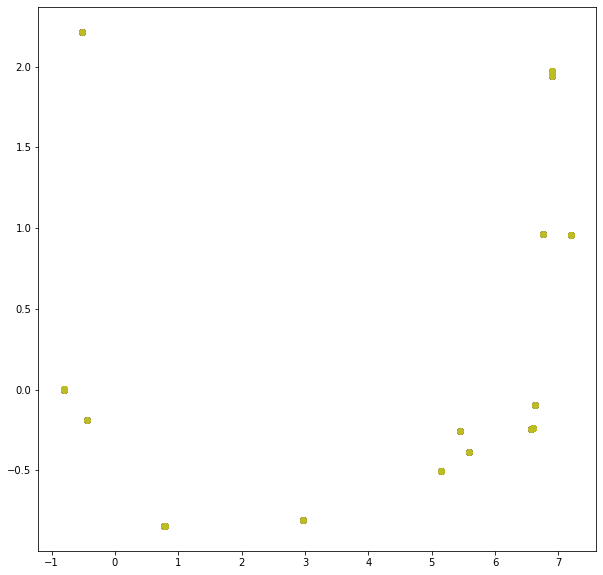

In [13]:
fig = plt.figure(figsize=(10,10))
print(encoded.shape)
for i in range(len(pokemons_files)):
    plt.scatter(projected[:,0],projected[:,1])

In [14]:
v = np.var(out, axis=0)
print(v)

[[[3.88083654e-03 4.66040382e-03 8.46918738e-06]
  [9.64597519e-03 7.73101160e-03 1.62695860e-03]
  [7.44060241e-03 1.22526577e-02 1.63435622e-03]
  ...
  [1.10916537e-03 8.04461166e-03 1.94369373e-03]
  [2.19739112e-03 4.56270576e-03 1.92858570e-03]
  [1.17628151e-04 1.22828339e-03 1.15877157e-03]]

 [[7.39077432e-03 9.99057107e-03 1.48574007e-04]
  [3.64524722e-02 1.20385895e-02 1.13926018e-02]
  [1.87295917e-02 1.58117842e-02 8.10509920e-03]
  ...
  [6.15880033e-03 1.00185554e-02 1.20678963e-02]
  [1.79736279e-02 7.52624962e-03 1.54720023e-02]
  [1.21339843e-04 1.65762991e-04 3.64552834e-03]]

 [[9.83609166e-03 1.22350035e-02 2.22344045e-03]
  [3.88177931e-02 1.96970645e-02 1.81935485e-02]
  [2.05853563e-02 2.72410139e-02 1.72979049e-02]
  ...
  [3.89447692e-03 2.10889392e-02 2.15570237e-02]
  [1.57815237e-02 1.66220311e-02 2.24698726e-02]
  [1.19362972e-04 2.37137452e-03 7.76309334e-03]]

 ...

 [[1.19077484e-03 1.83982134e-03 9.69588757e-04]
  [2.61285212e-02 8.33506696e-03 1.4649

In [15]:
U,s,vh = svd(encoded)
selection=s/s.max()*100 
print(selection[selection>10])
print(selection[selection>10].shape)

[100.        27.396673]
(2,)


[0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


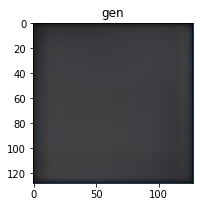

In [16]:
a = [0.2]+[0]*(latent_dim_size-1)
print(a)
img = cnnbvae.decoder.predict(np.array(np.reshape(a,(1,latent_dim_size))))
show_photos(img, ["gen"])

RuntimeError: Requested MovieWriter (ffmpeg) not available

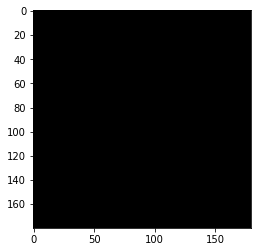

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML


# Now let's sample this subspace
rn = np.arange(-10,10,0.1)
rn1 = np.arange(-10,10,0.1)
latent = np.zeros((rn.shape[0],2))
latent[:,0]=rn1
latent[:,1]=rn

# Getback to full space
full_latent  = pca.inverse_transform(latent)

# Now predict
im = cnnbvae.decoder.predict(full_latent)

fig, ax = plt.subplots()

line = ax.imshow(np.zeros((180,180,3)))
# initialization function: plot the background of each frame
def init():
    line.set_data(np.zeros((180,180,3)))
    return (line,)

def animate(i):
    line.set_data(im[i,:,:,:]/im[i,:,:,:].max())
    return (line,)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=im.shape[0], interval=200, blit=True)
HTML(anim.to_html5_video())



In [18]:
bvae.save("../models/model_final.h5")

# Bibliography
 - B.1 Higgins, I. et al. “beta-VAE: Learning Basic Visual Concepts with a Constrained Variational Framework.” ICLR (2017).